In [388]:
%config InlineBackend.figure_format = 'retina'
from micecat_field import *

ra_arr = np.arange(32,59,2)[::2]
dec_arr = np.arange(2,29,3)[::2]
dec_grid, ra_grid = np.meshgrid(dec_arr, ra_arr)
ra_arr, dec_arr = ra_grid.flatten(), dec_grid.flatten()

bandwl_dict = {'euclid_nisp_y':1.073286}
abs_mag_cut = -18

***
***

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:73: RuntimeWarning: invalid value encountered in double_scalars


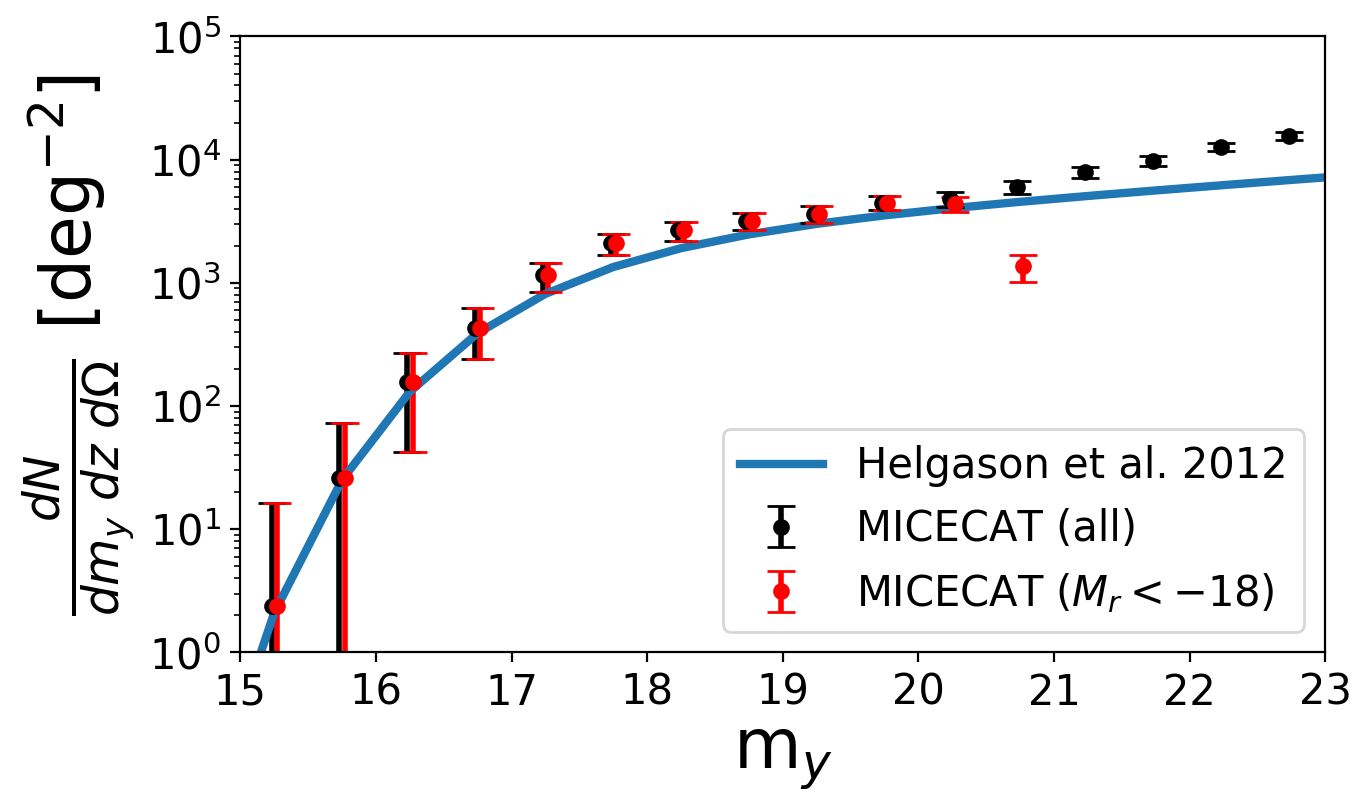

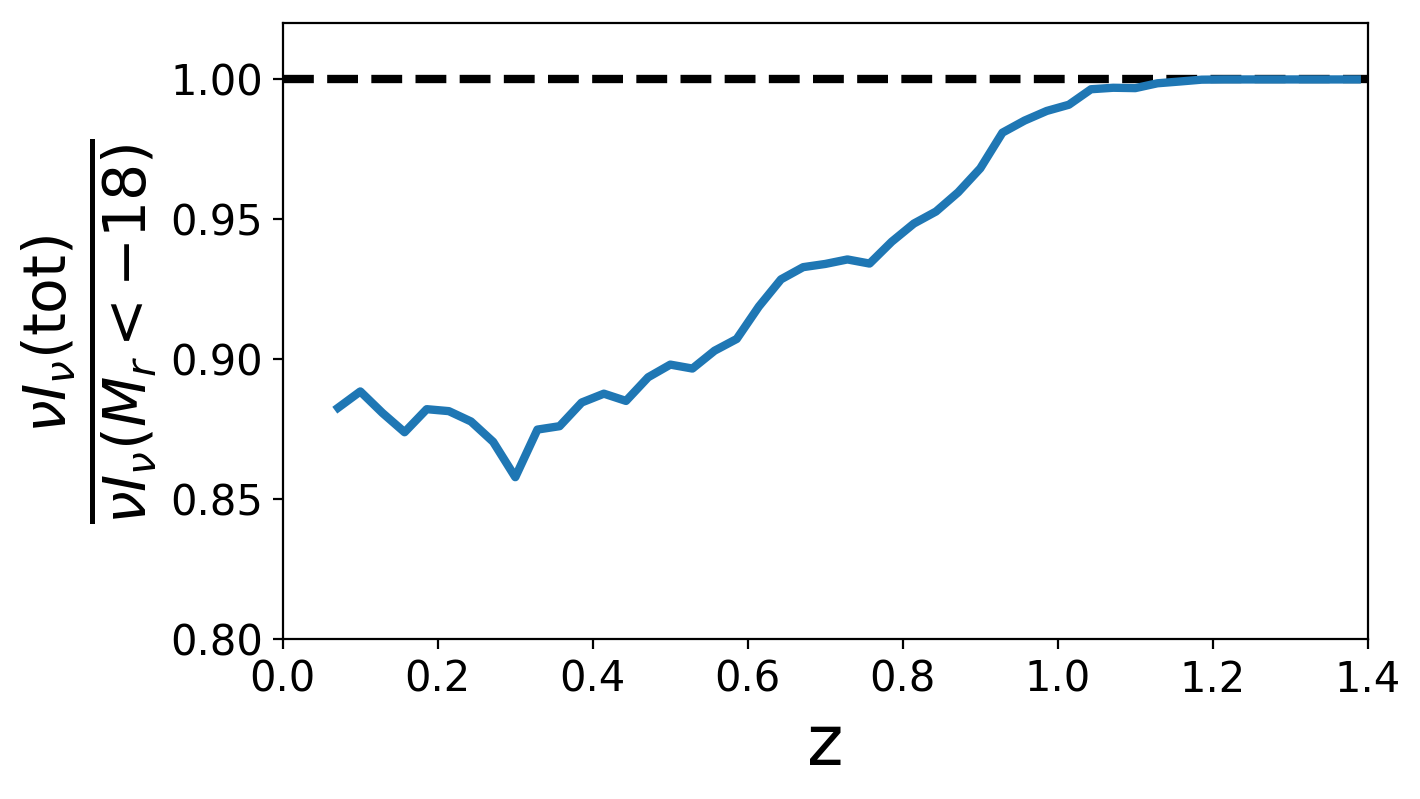

In [260]:
# z_min, z_max = 0.197, 0.203
# z_mid = (z_min + z_max) / 2

# mbinedges = np.arange(14, 28, 0.5)
# mbins = (mbinedges[1:] + mbinedges[:-1]) / 2
# dm = mbinedges[1] - mbinedges[0]

# phi_mc = 0
# phi_mc_tot = 0
# for i in range(len(ra_arr)):
#     print(i)
#     mcfield = micecat_field(ra_arr[i], dec_arr[i])
#     df = mcfield.get_micecat_df(add_fields=['sdss_r_abs_mag', 'euclid_nisp_y_true'])
#     dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max)]
#     m = dfi['euclid_nisp_y_true'].values
#     phi_mci = np.histogram(m, bins=mbinedges)[0]
#     phi_mc_tot += phi_mci

#     dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) \
#              & (df.sdss_r_abs_mag <= abs_mag_cut)]
#     m = dfi['euclid_nisp_y_true'].values
#     phi_mci = np.histogram(m, bins=mbinedges)[0]
#     phi_mc += phi_mci
# phi_mc_tot = phi_mc_tot/len(ra_arr)
# phi_mc = phi_mc/len(ra_arr)

# phi_mc_tot_err = np.sqrt(phi_mc_tot)
# phi_mc_tot = phi_mc_tot/dm/(z_max-z_min)/Omega_cat
# phi_mc_tot_err = phi_mc_tot_err/dm/(z_max-z_min)/Omega_cat

# phi_mc_err = np.sqrt(phi_mc)
# phi_mc = phi_mc/dm/(z_max-z_min)/Omega_cat
# phi_mc_err = phi_mc_err/dm/(z_max-z_min)/Omega_cat
# clear_output()

fig, ax = plt.subplots(1,1,figsize=(7,4))

Omega_cat = 4

band = 'euclid_nisp_y'
sp = np.where(dfi['sdss_r_abs_mag'].values < -18)[0]
bandwl = bandwl_dict[band]
# dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,zmin=z_min,zmax=z_max,m_min=m_min,m_max=m_max) \
#                 for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
# dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / (z_max - z_min)
# dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) / (u.sr).to(u.deg**2)
ax.semilogy(mbins, dN_dm_ddeg2h,'C0', lw=3, label='Helgason et al. 2012')
ax.errorbar(mbins-0.02, phi_mc_tot, phi_mc_tot_err, label='MICECAT (all)',
               color='k', capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
ax.errorbar(mbins+0.02, phi_mc, phi_mc_err, label=r'MICECAT ($M_r < -18$)',
               color='r', capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
ax.set_ylim([1e0,1e5])
ax.set_xlim([15,23])
ax.set_yscale('log')
ax.set_ylabel(r'$\frac{dN}{dm_{y}\,\,dz\,\,d\Omega}$' +r' [deg$^{-2}$]',fontsize=25)
ax.set_xlabel(r'm$_y$', fontsize=25)
ax.legend(fontsize=15, loc=4)
ax.tick_params(labelsize=15)

fig, ax = plt.subplots(1,1,figsize=(7,4))
# mcfield = micecat_field(ra_arr[0], dec_arr[0])
# df = mcfield.get_micecat_df(add_fields=['sdss_r_abs_mag', 'euclid_nisp_y_true'])
zbinedges = np.linspace(0,1.4,50)
zbins = (zbinedges[1:] + zbinedges[:-1]) / 2
dz = zbinedges[1] - zbinedges[0]
r_arr = np.zeros_like(zbins)
for i in range(len(zbins)):
    dfi = df[(df.z_cgal >= zbinedges[i]) & (df.z_cgal < zbinedges[i+1]) \
             & (df.sdss_r_abs_mag <= abs_mag_cut)]
    F = np.sum(10**(-dfi['euclid_nisp_y_true'].values/2.5))
    dfi = df[(df.z_cgal >= zbinedges[i]) & (df.z_cgal < zbinedges[i+1])]
    m = dfi['euclid_nisp_y_true'].values
    F_tot = np.sum(10**(-dfi['euclid_nisp_y_true'].values/2.5))
    r_arr[i] = F/F_tot
ax.axhline(1, c='k', ls='--', lw=3)
ax.plot(zbins, r_arr, lw=3)
ax.set_ylabel(r'$\frac{\nu I_\nu ({\rm tot})}{\nu I_\nu (M_r < -18)}$',fontsize=30)
ax.set_xlabel(r'z', fontsize=25)
ax.set_ylim([0.8,1.02])
ax.set_xlim([0,1.4])
ax.tick_params(labelsize=15)

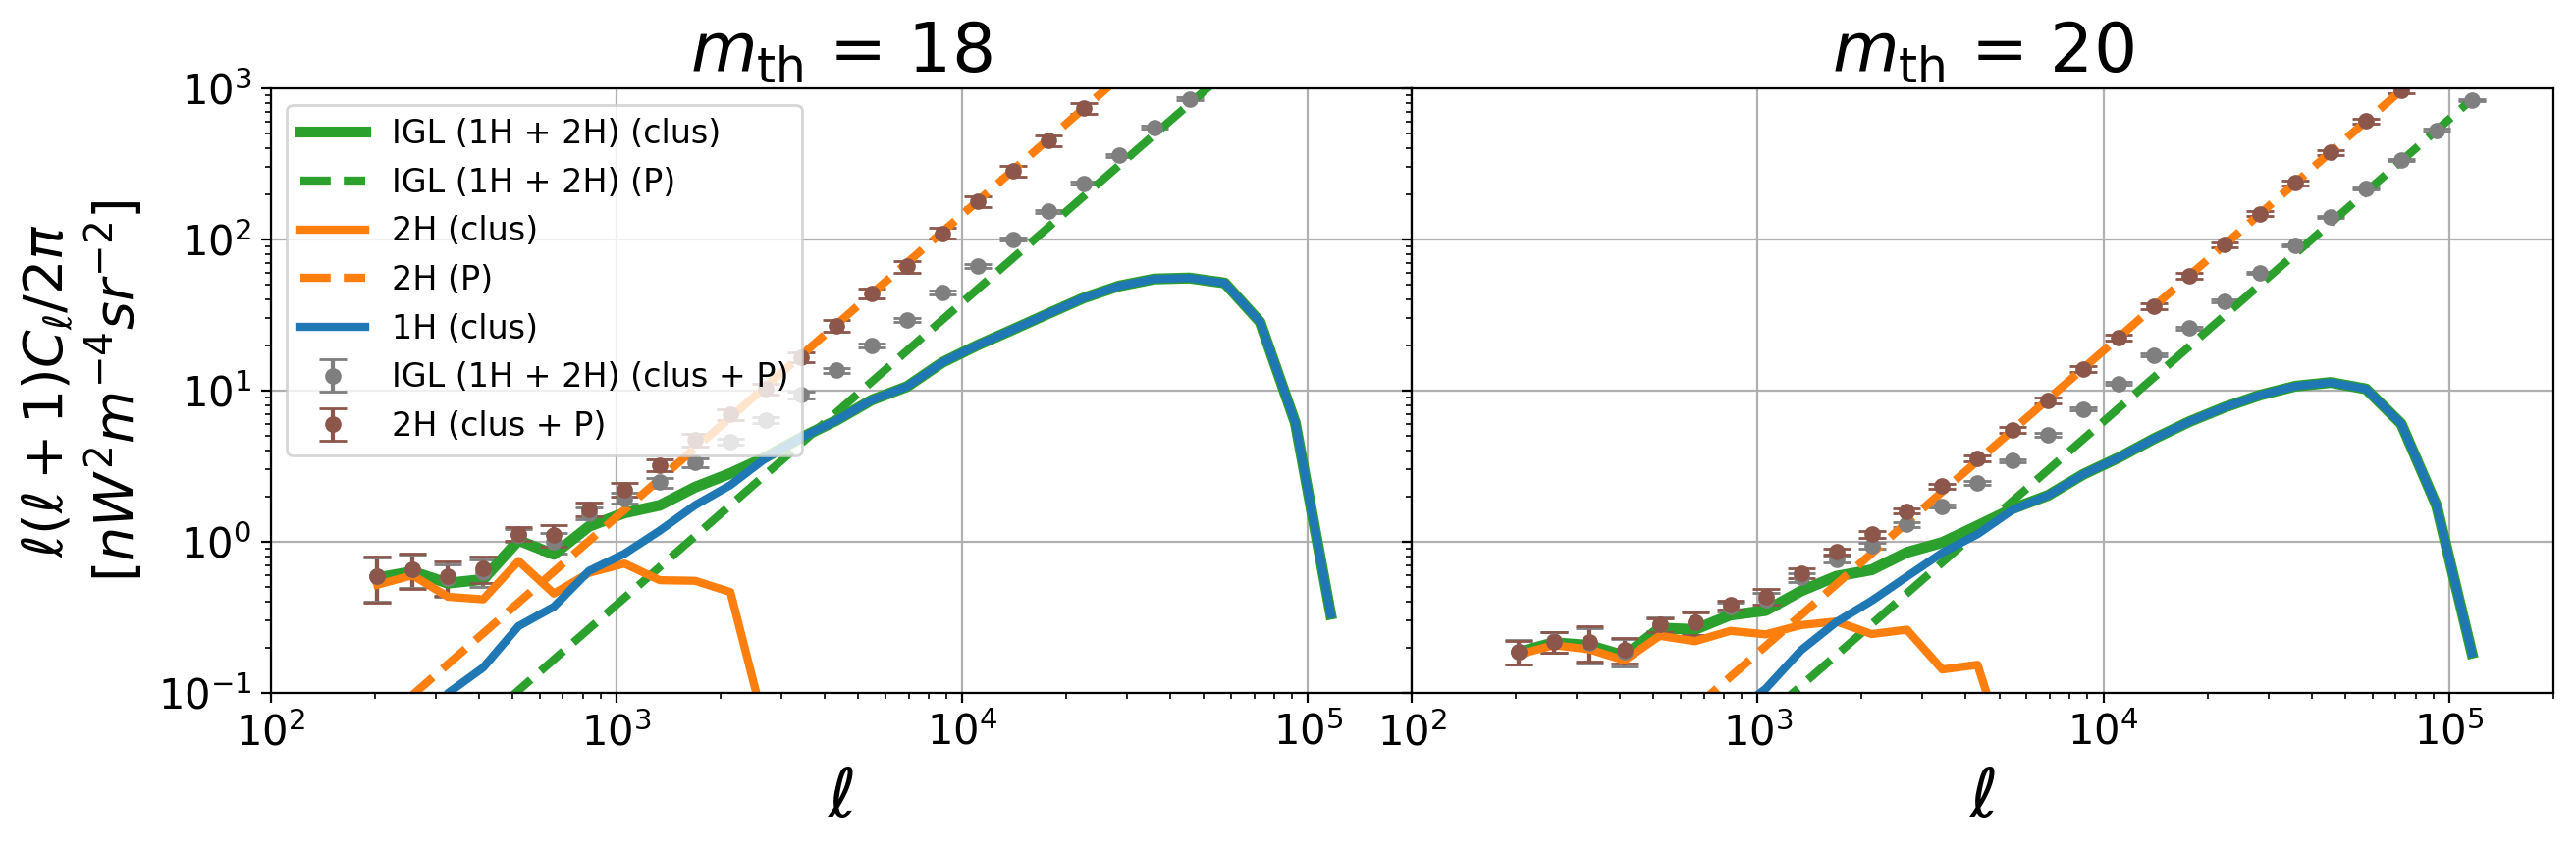

In [552]:
fig, ax = plt.subplots(1,2, figsize=(15, 4))
for i, m_th in enumerate([18,20]):
    Cl_data = get_Cl_data(ihl_model='NFW', m_th=m_th)

    l = Cl_data['l']
    Nfields = Cl_data['tot']['Cl2'].shape[0]
    Cl2 = Cl_data['tot']['Cl2']
    Cla = Cl_data['tot']['Cla']
    Cl2_shsub = Cl2 - np.tile(np.mean(Cl2[:,-3:], axis=1), (28,1)).T
    Cla_shsub = Cla - np.tile(np.mean(Cla[:,-3:], axis=1), (28,1)).T

    Dl = l*(l+1)*np.median(Cla, axis=0)/2
    Dl_err = l*(l+1)*(np.percentile(Cla, 84, axis=0) \
                      - np.percentile(Cla, 16, axis=0))/2/np.sqrt(Nfields)
    plot_err_log(l, Dl, Dl_err, ax=ax[i], plot_xerr=False, color='C7',
                 label='IGL (1H + 2H) (clus + P)')

    Dl = l*(l+1)*np.median(Cla_shsub, axis=0)/2
    idx_cut = np.where(Dl<0)[0][0]
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(Dl[idx_cut-4:idx_cut]))
    Dla_fit = Dl.copy()
    Dla_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
    ax[i].loglog(l, Dla_fit,'C2', lw=4, label='IGL (1H + 2H) (clus)')
    Dl = l*(l+1)*np.median(Cla-Cla_shsub, axis=0)/2
    ax[i].loglog(l, Dl, 'C2--', lw=3, label='IGL (1H + 2H) (P)')

    #===========================

    Dl = l*(l+1)*np.median(Cl2, axis=0)/2
    Dl_err = l*(l+1)*(np.percentile(Cl2, 84, axis=0) \
                      - np.percentile(Cl2, 16, axis=0))/2/np.sqrt(Nfields)
    plot_err_log(l, Dl, Dl_err, ax=ax[i], plot_xerr=False, color='C5', label='2H (clus + P)')

    Dl = l*(l+1)*np.median(Cl2_shsub, axis=0)/2
    idx_cut = np.where(Dl<0)[0][0]
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(Dl[idx_cut-4:idx_cut]))
    Dl2_fit = Dl.copy()
    Dl2_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
    ax[i].loglog(l, Dl2_fit,'C1', lw=3, label='2H (clus)')
    Dl = l*(l+1)*np.median(Cl2-Cl2_shsub, axis=0)/2
    ax[i].loglog(l, Dl, 'C1--', lw=3, label='2H (P)')

    ax[i].loglog(l, Dla_fit - Dl2_fit,'C0', lw=3, label='1H (clus)')
    
    ax[i].set_ylim([1e-1,1e3])
    ax[i].set_xlim([1e2,2e5])
    ax[i].set_xlabel(r'$\ell$', fontsize=25)
    ax[i].tick_params(labelsize=15)
    ax[i].grid()
    ax[i].set_title(r'$m_{\rm th}$ = %d'%(m_th), fontsize=25)
ax[0].legend(loc=2, fontsize=12)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$', fontsize=20)
ax[1].tick_params(axis='y',labelleft=False)
plt.subplots_adjust(wspace=0)

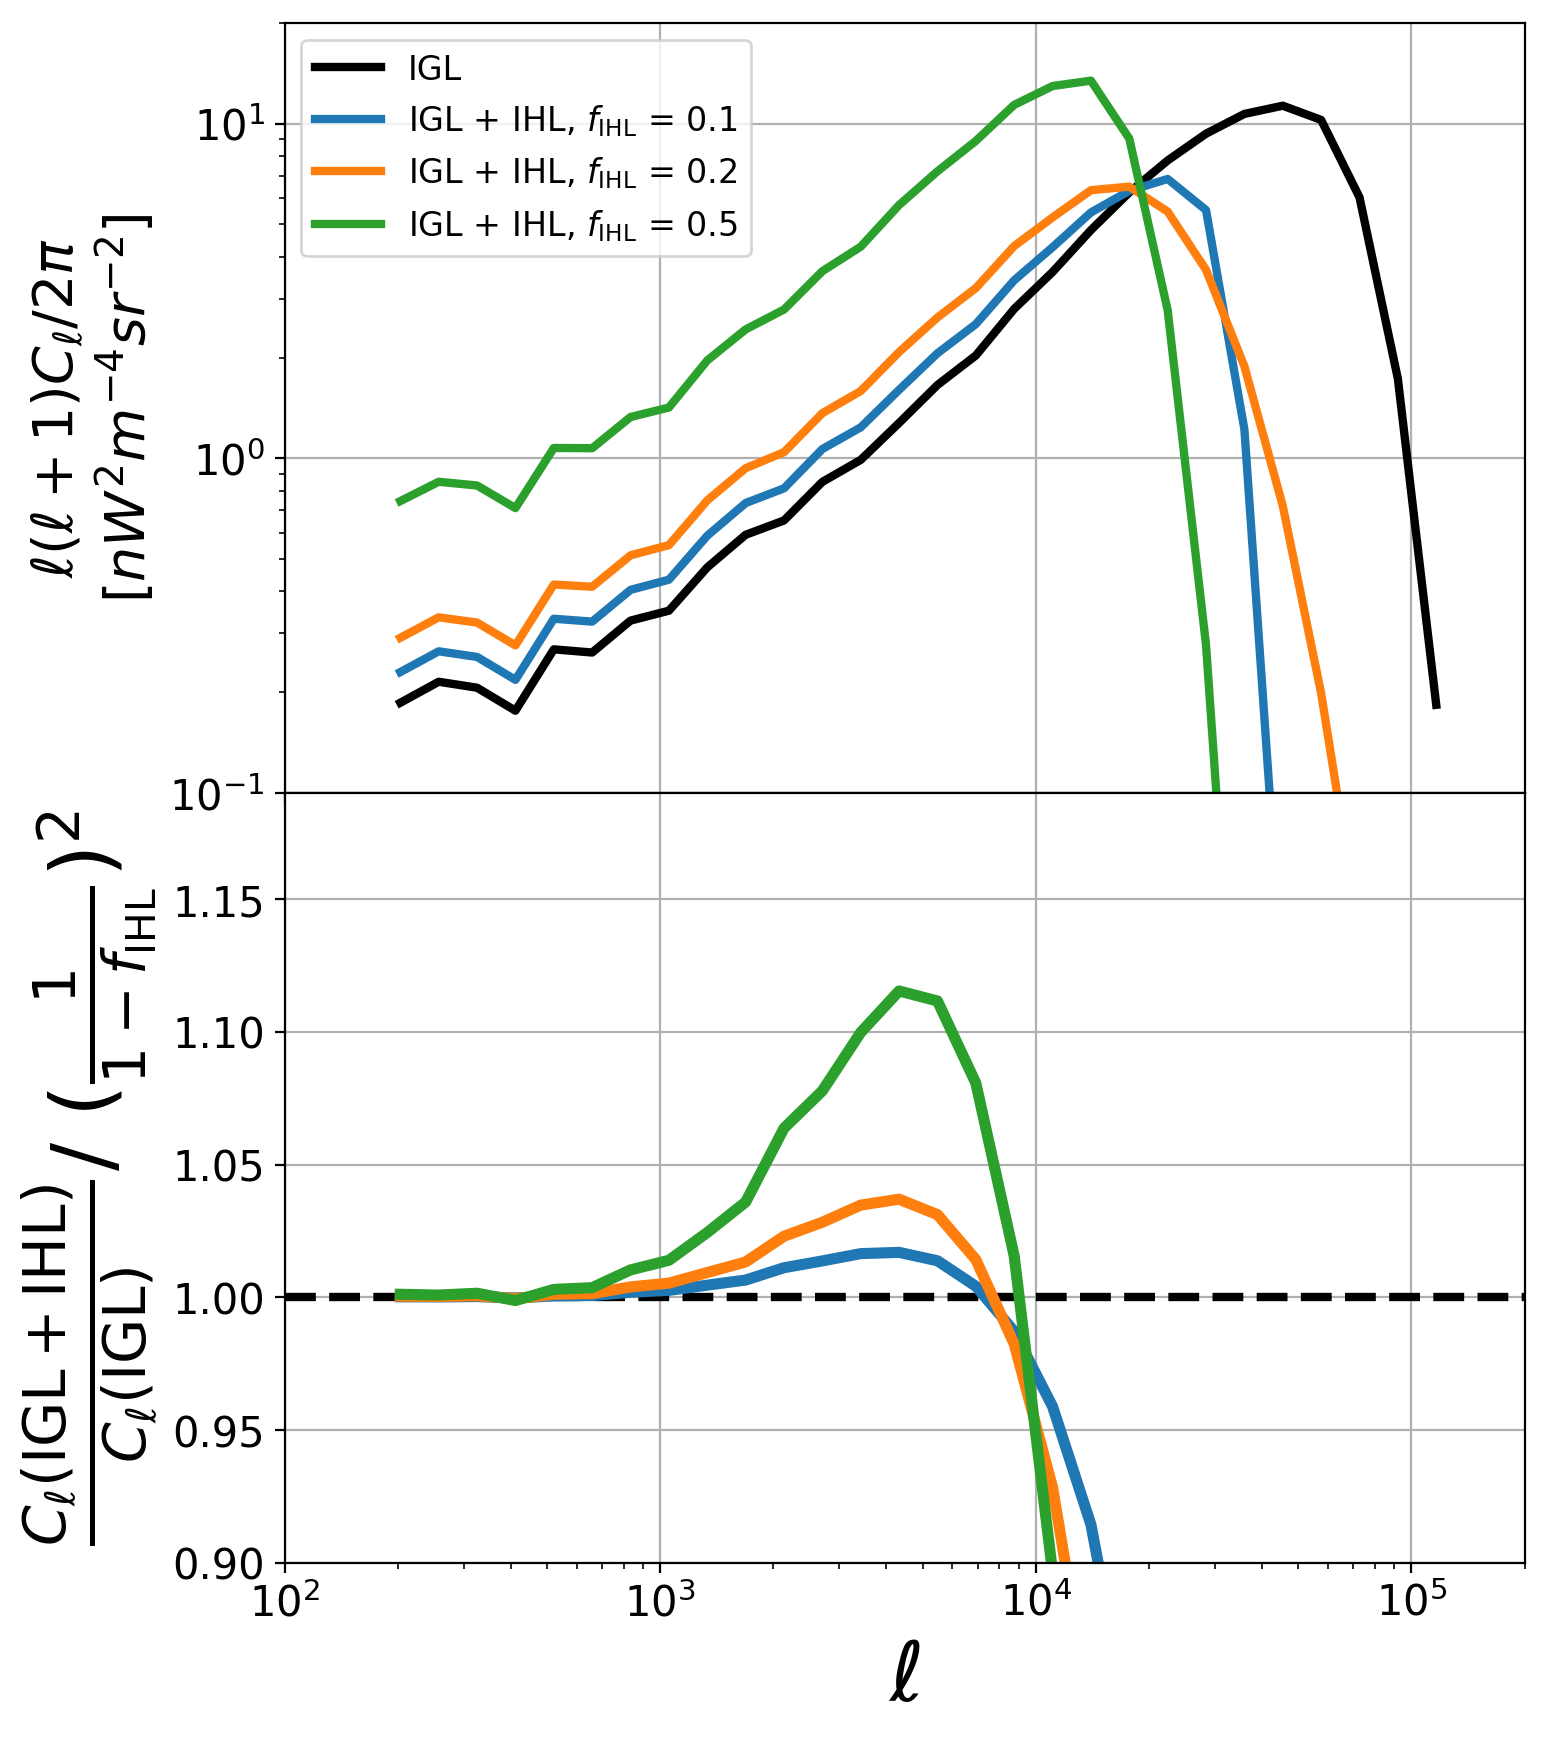

In [528]:
m_th = 20
Cl_data = get_Cl_data(ihl_model='NFW', m_th=m_th)
f_IHL_arr = [0.1, 0.2, 0.5]

fig, ax = plt.subplots(2,1,figsize=(8,10))

l = Cl_data['l']
Nfields = Cl_data['tot']['Cl2'].shape[0]
Cla = Cl_data['tot']['Cla'].copy()
Cla_sh = np.tile(np.mean(Cla[:,-3:], axis=1), (28,1)).T
Cla_shsub = Cla - Cla_sh    
Dl = l*(l+1)*np.median(Cla_shsub, axis=0)/2
idx_cut = np.where(Dl<0)[0][0]
spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                np.log(Dl[idx_cut-4:idx_cut]))
Dla_fit = Dl.copy()
Dla_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
ax[0].loglog(l, Dla_fit,'k', lw=3, label='IGL')
ax[1].axhline(1, c='k', lw=3, ls='--')
for i, f_IHL in enumerate(f_IHL_arr):
    r_IHL = f_IHL / (1 - f_IHL)
    Clah = (Cl_data['tot']['Cla'] +\
                            r_IHL**2*Cl_data['tot']['Clh'] +\
                            2*r_IHL*Cl_data['tot']['Clha'])
    Clah_shsub = Clah - Cla_sh * (1+r_IHL)**2


    Dl = l*(l+1)*np.median(Clah_shsub, axis=0)/2
    idx_cut = np.where(Dl<0)[0][0]
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(Dl[idx_cut-4:idx_cut]))
    Dlah_fit = Dl.copy()
    Dlah_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))

    ax[0].loglog(l, Dlah_fit,'C'+str(i), lw=3, 
                 label='IGL + IHL, ' + r'$f_{\rm IHL}$'+ ' = {}'.format(f_IHL))

    r = np.median(Clah_shsub/Cla_shsub/(1+r_IHL)**2, axis=0)
    idx_cut = np.where(r<0)[0][0]
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(r[idx_cut-4:idx_cut]))
    r_fit = r.copy()
    r_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
    ax[1].semilogx(l, r_fit, 'C'+str(i), lw=4)
    
ax[0].set_ylim([1e-1,2e1])
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
ax[0].grid()
ax[1].grid()
ax[0].legend(loc=2, fontsize=12)
ax[1].set_xlabel(r'$\ell$', fontsize=30)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$', fontsize=20)
ax[1].set_ylabel(r'$\frac{C_\ell{\rm (IGL + IHL)}}{C_\ell{\rm (IGL)}}$' +\
                 r'/ $(\frac{1}{1-f_{\rm IHL}})^2$', fontsize=30)
ax[0].tick_params(axis='x',labelbottom=False)
ax[1].set_ylim([0.9,1.19])
ax[0].set_xlim([1e2,2e5])
ax[1].set_xlim([1e2,2e5])
plt.subplots_adjust(hspace=0)

Text(0.5, 1.0, 'IHL - isothermal')

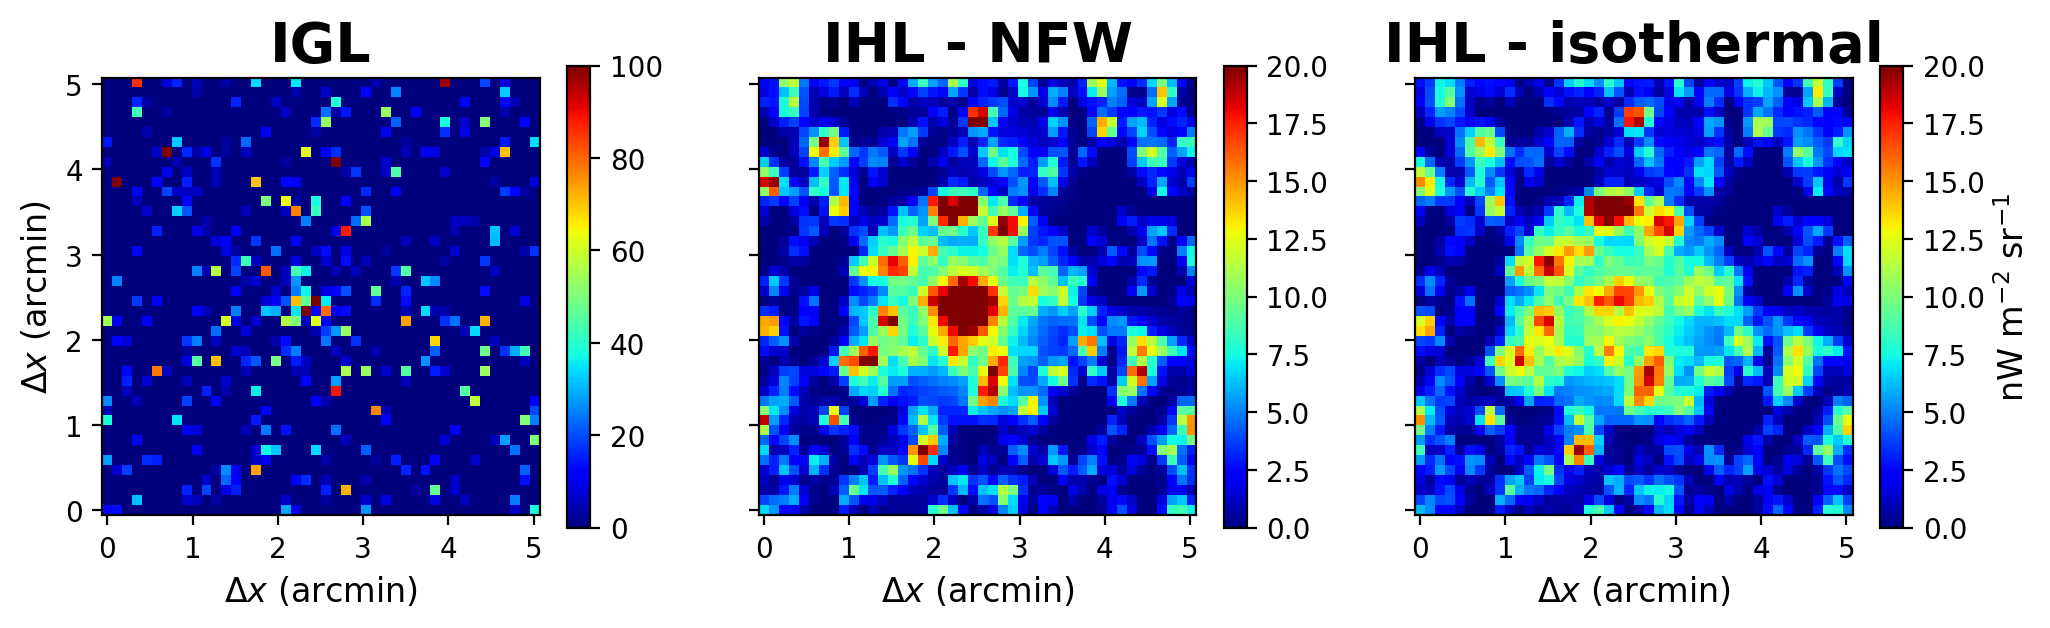

In [527]:
m_th = 20
fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
+'micecat_IHL_Cl_data_ra{}_dec{}_mth{}_mkk.pkl'\
.format(ra_arr[0], dec_arr[0], m_th)
with open(fname, "rb") as f:
    Cl_data = pickle.load(f)
    
srcmap_all = Cl_data['srcmap_all']
srcmap_allcen = Cl_data['srcmap_allcen']
ihlmap_NFW = Cl_data['ihlmap_NFW']
ihlmap_iso = Cl_data['ihlmap_iso']

fig, ax = plt.subplots(1,3,figsize=(12,3))
pixticks = np.arange(0, 43, 60/7)
pixtick_labels = ['0', '1', '2', '3', '4', '5']

p = imageclip(srcmap_all[690:734,160:204], ax=ax[0], vmin=0, vmax=100, return_objects=True)
ax[0].set_xticks(pixticks)
ax[0].set_xticklabels(pixtick_labels, fontsize=10)
ax[0].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
ax[0].set_ylabel(r"$\Delta x$ (arcmin)", fontsize=12)
ax[0].set_yticks(pixticks)
ax[0].set_yticklabels(pixtick_labels, fontsize=10)
ax[0].set_title('IGL', fontsize=20, weight='bold')

p = imageclip(ihlmap_NFW[690:734,160:204], ax=ax[1], vmin=0, vmax=20, return_objects=True)
ax[1].set_xticks(pixticks)
ax[1].set_xticklabels(pixtick_labels, fontsize=10)
ax[1].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
ax[1].set_yticks(pixticks)
ax[1].set_yticklabels(['']*len(pixticks), fontsize=10)
ax[1].set_title('IHL - NFW', fontsize=20, weight='bold')

p = imageclip(ihlmap_iso[690:734,160:204], ax=ax[2], vmin=0, vmax=20, return_objects=True)
p['cbar'].ax.set_ylabel(r'nW m$^{-2}$ sr$^{-1}$', rotation=90, fontsize=12)
ax[2].set_xticks(pixticks)
ax[2].set_xticklabels(pixtick_labels, fontsize=10)
ax[2].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
ax[2].set_yticks(pixticks)
ax[2].set_yticklabels(['']*len(pixticks), fontsize=10)
ax[2].set_title('IHL - isothermal', fontsize=20, weight='bold')

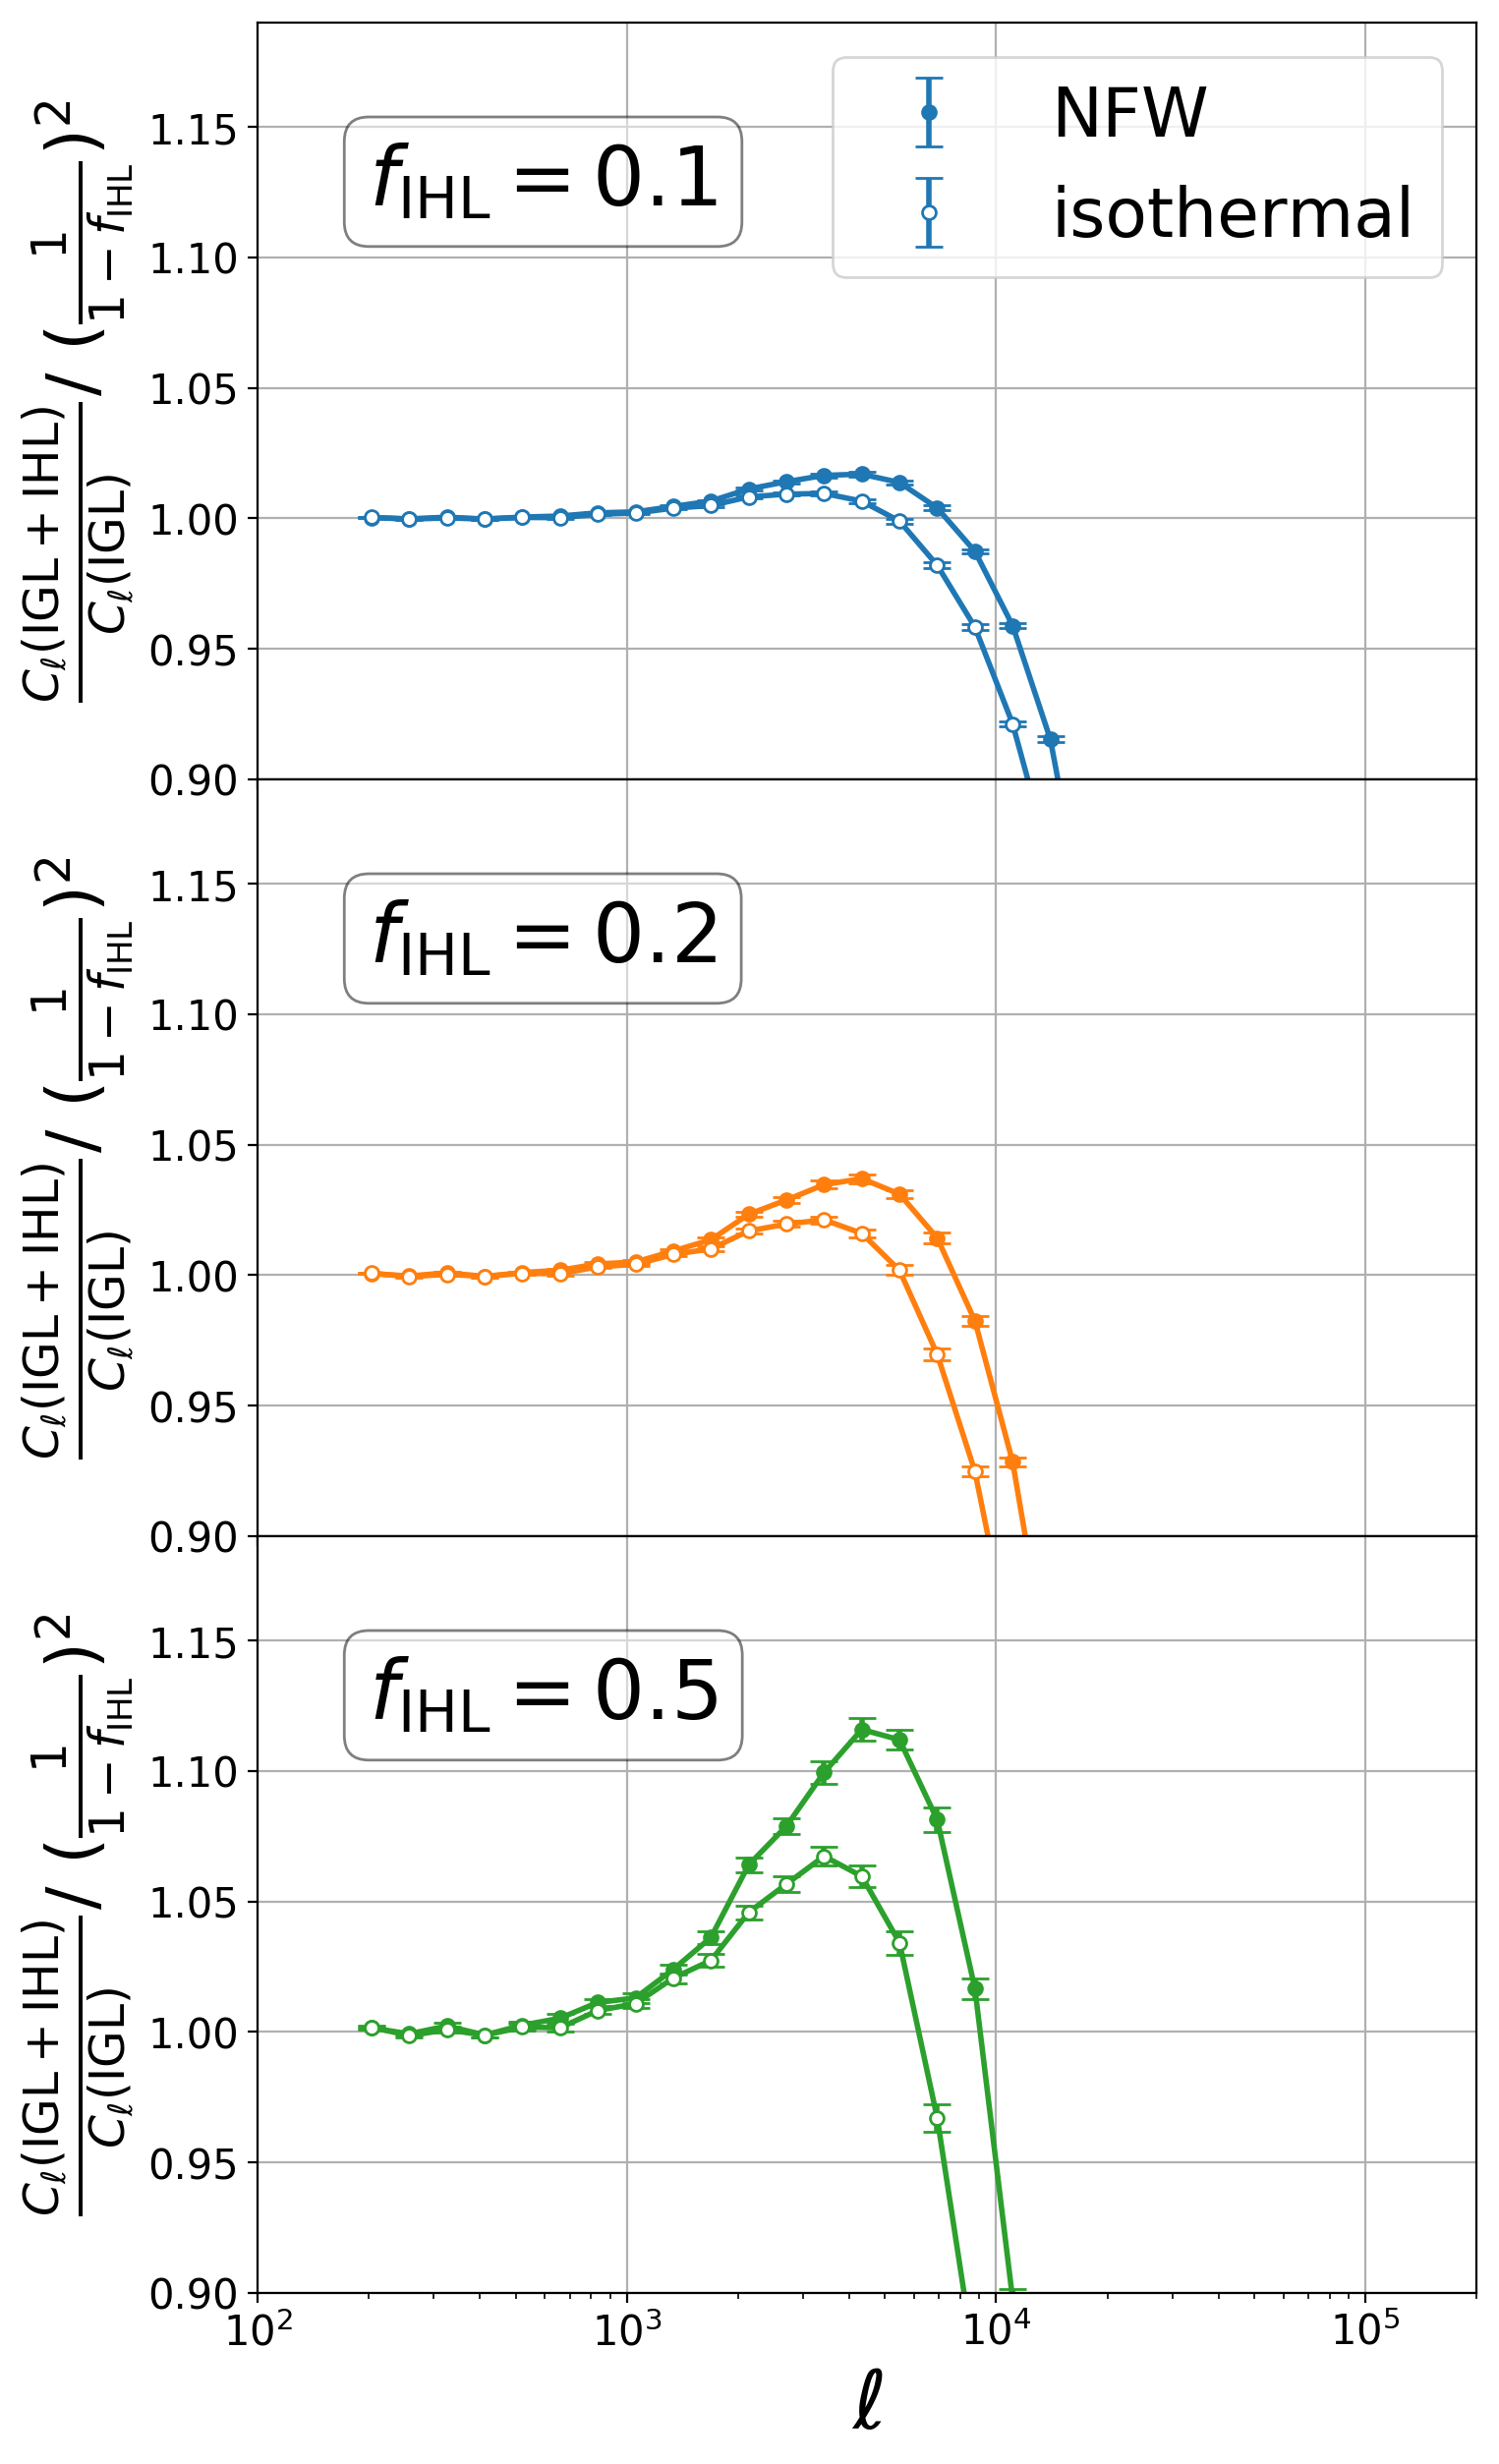

In [526]:
m_th = 20
Cl_data = get_Cl_data_ihlmodel(m_th=m_th)
f_IHL_arr = [0.1, 0.2, 0.5]

fig, ax = plt.subplots(3,1,figsize=(8,15))

for i, f_IHL in enumerate(f_IHL_arr):
    
    r_IHL = f_IHL / (1 - f_IHL)
    
    for ihlmodel,c, label in zip(['NFW', 'iso'], ['C0','C1'],['NFW', 'isothermal']):
        l = Cl_data['l']
        Nfields = Cl_data['Cl2'].shape[0]
        Cla = Cl_data['Cla'].copy()
        Cla_sh = np.tile(np.mean(Cla[:,-3:], axis=1), (28,1)).T
        Cla_shsub = Cla - Cla_sh

        Clah = (Cl_data['Cla'] +\
                                r_IHL**2*Cl_data['Clh_' + ihlmodel] +\
                                2*r_IHL*Cl_data['Clha_' + ihlmodel])
        Clah_shsub = Clah - Cla_sh * (1+r_IHL)**2

        r = np.median(Clah_shsub/Cla_shsub/(1+r_IHL)**2, axis=0)
        r_err = (np.percentile(Clah_shsub/Cla_shsub/(1+r_IHL)**2, 84, axis=0) \
        - np.percentile(Clah_shsub/Cla_shsub/(1+r_IHL)**2, 16, axis=0))/2
        r_err /= np.sqrt(200/4) # SPHEREx deep fields 200 ==> deg^2 = 50 2x2 deg fields
        idx_cut = np.where(r<0)[0][0]
        spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                        np.log(r[idx_cut-4:idx_cut]))
        r_fit = r.copy()
        r_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
        
        if ihlmodel == 'NFW':
            ax[i].semilogx(l, r_fit, c='C'+str(i), lw=2)
            ax[i].errorbar(l[:20], r_fit[:20], r_err[:20], c='C'+str(i), label=label,
                           capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
        if ihlmodel == 'iso':
            ax[i].semilogx(l, r_fit, c='C'+str(i), lw=2)
            ax[i].errorbar(l[:20], r_fit[:20], r_err[:20], c='C'+str(i), mfc='white', label=label,
                           capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
    ax[i].set_xscale('log')
    ax[i].tick_params(labelsize=15)
    ax[i].grid()
    ax[i].set_ylim([0.9,1.19])
    ax[i].set_ylabel(r'$\frac{C_\ell{\rm (IGL + IHL)}}{C_\ell{\rm (IGL)}}$' +\
                     r'/ $(\frac{1}{1-f_{\rm IHL}})^2$', fontsize=25)
    ax[i].text(2e2, 1.12, r'$f_{\rm IHL} = $' + '{}'.format(f_IHL), fontsize=30,
               bbox={'boxstyle':'round','facecolor': 'white', 'alpha':0.5})
ax[0].legend(loc=1, fontsize=25)
ax[2].set_xlabel(r'$\ell$', fontsize=30)
ax[0].set_xlim([1e2,2e5])
ax[1].set_xlim([1e2,2e5])
ax[2].set_xlim([1e2,2e5])
ax[0].tick_params(axis='x',labelbottom=False)
ax[1].tick_params(axis='x',labelbottom=False)
plt.subplots_adjust(hspace=0)

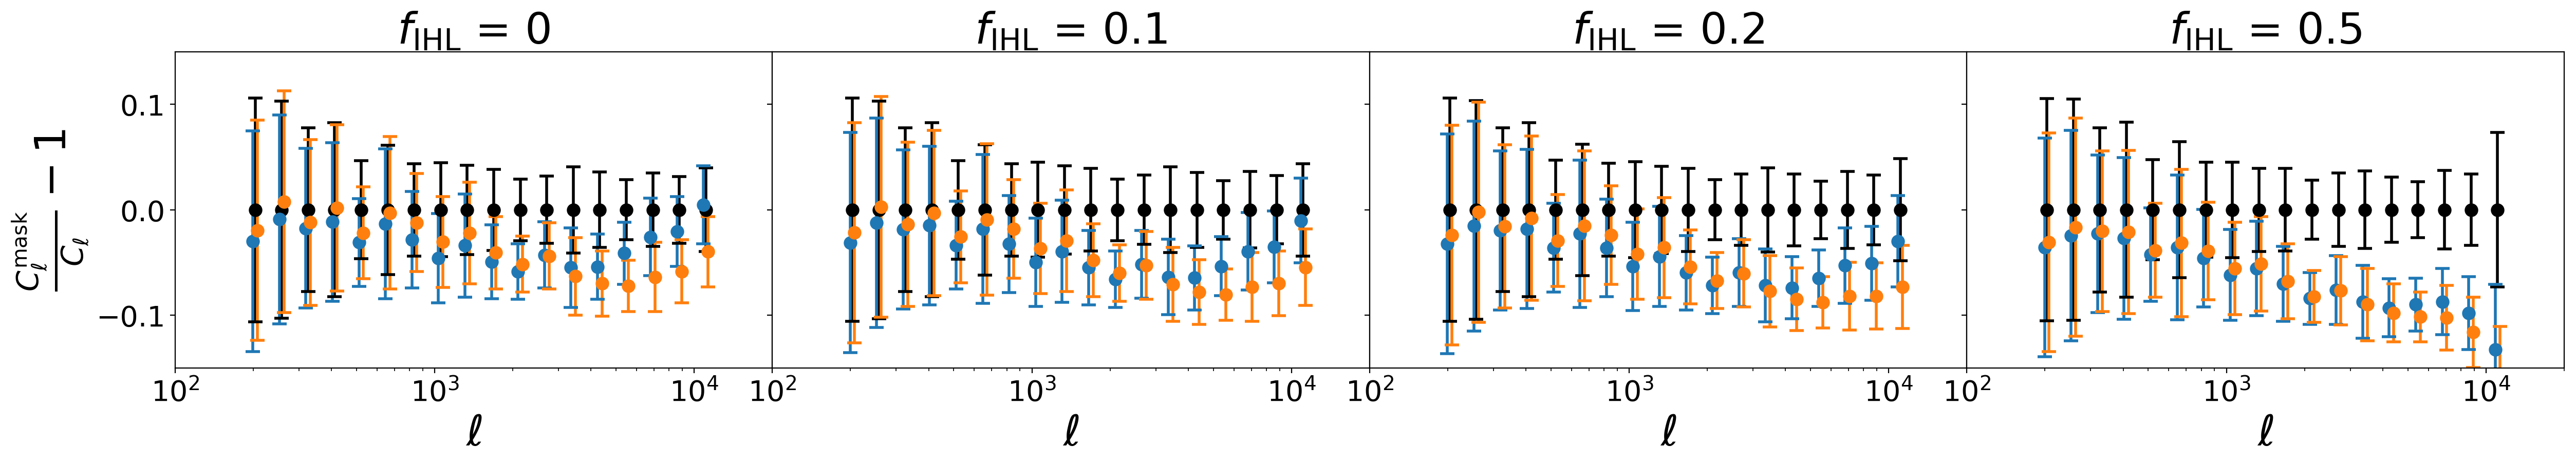

In [525]:
m_th = 18

fig, ax = plt.subplots(1,4,figsize=(30,4))
for i,f_IHL in enumerate([0,0.1,0.2,0.5]):
    Nfields = len(ra_arr)
    r_IHL = f_IHL / (1 - f_IHL)

    Cl_data = {}
    fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
    +'micecat_IHL_Cl_data_ra{}_dec{}_mth{}_mkk.pkl'.format(ra_arr[0], dec_arr[0], m_th)
    with open(fname, "rb") as f:
        Cl_datai = pickle.load(f)

    Cl_data['l'] = Cl_datai['l']
    Cl_data['Cla'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Cla_shsub'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam0'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam0_shsub'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam1'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam1_shsub'] = np.zeros((Nfields, len(Cl_data['l'])))

    for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_arr, dec_arr)):
        fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
        +'micecat_IHL_Cl_data_ra{}_dec{}_mth{}_mkk.pkl'.format(ra_cent, dec_cent, m_th)
        with open(fname, "rb") as f:
            Cl_datai = pickle.load(f)

        Cl_data['Cla'][ifield] = Cl_datai['Cla'] \
        + 2*r_IHL*Cl_datai['Clha_NFW_unmasked'] + r_IHL**2*Cl_datai['Clh_NFW_unmasked']

        Clash = np.mean(Cl_datai['Cla'][-3:])*(1+r_IHL)**2
        Cl_data['Cla_shsub'][ifield] = Cl_data['Cla'][ifield] - Clash

        Cl_data['Clam0'][ifield] = Cl_datai['Clpsf_mkk'][0] \
        + 2*r_IHL*Cl_datai['Clph_NFW_mkk'][0] + r_IHL**2*Cl_datai['Clh_NFW_mkk']
        Cl_data['Clam0_shsub'][ifield] = Cl_data['Clam0'][ifield] - Clash

        Cl_data['Clam1'][ifield] = Cl_datai['Clpsf_mkk'][-1] \
        + 2*r_IHL*Cl_datai['Clph_NFW_mkk'][-1] + r_IHL**2*Cl_datai['Clh_NFW_mkk']
        Cl_data['Clam1_shsub'][ifield] = Cl_data['Clam1'][ifield] - Clash

    sp = np.arange(18)
    
    Nfields = 50
    l = Cl_data['l']
    Cla = np.mean(Cl_data['Cla'],axis=0)
    Cla_err = (np.percentile(Cl_data['Cla'], 84, axis=0) \
               - np.percentile(Cl_data['Cla'], 16, axis=0)) / 2 / np.sqrt(Nfields)
    Cla_shsub = np.mean(Cl_data['Cla_shsub'],axis=0)

    ax[i].errorbar(l[sp], Cla_shsub[sp]/Cla_shsub[sp]-1, Cla_err[sp]/Cla_shsub[sp],
                    c='k', capsize=5, markersize=15, elinewidth=2, markeredgewidth=2, fmt='.')

    for ipsf,c,xoff in zip([0,-1],['C0','C1'],[0.98,1.02]):
        if ipsf==0:
            Clam = np.mean(Cl_data['Clam0'],axis=0)
            Clam_err = np.std(Cl_data['Clam0'],axis=0) / np.sqrt(Nfields)
            Clam_err = (np.percentile(Cl_data['Clam0'], 84, axis=0) \
                       - np.percentile(Cl_data['Clam0'], 16, axis=0)) / 2 / np.sqrt(Nfields)
            Clam_shsub = np.mean(Cl_data['Clam0_shsub'],axis=0)
        else:
            Clam = np.mean(Cl_data['Clam1'],axis=0)
            Clam_err = np.std(Cl_data['Clam1'],axis=0) / np.sqrt(Nfields)
            Clam_err = (np.percentile(Cl_data['Clam1'], 84, axis=0) \
                       - np.percentile(Cl_data['Clam1'], 16, axis=0)) / 2 / np.sqrt(Nfields)
            Clam_shsub = np.mean(Cl_data['Clam1_shsub'],axis=0)

        ax[i].errorbar(l[sp]*xoff, Clam_shsub[sp]/Cla_shsub[sp]-1, Clam_err[sp]/Cla_shsub[sp],
                       c=c, capsize=5, markersize=15, elinewidth=2, markeredgewidth=2, fmt='.',
                         label='1H+2H+IHL masked-Mkk \n ({} arcsec PSF)')

    ax[i].set_xscale('log')
    ax[i].set_yscale('linear')
    ax[i].set_xlabel(r'$\ell$', fontsize=30)
    ax[i].set_ylim([-0.15,0.15])
    ax[i].set_xlim([1e2,2e4])
    ax[i].tick_params(labelsize=20)
    ax[i].set_title(r'$f_{\rm IHL}$' + ' = {}'.format(f_IHL), fontsize=30)
ax[0].set_ylabel(r'$\frac{C_\ell^{\rm mask}}{C_\ell}-1$', fontsize=30)
ax[1].tick_params(axis='y',labelleft=False)
ax[2].tick_params(axis='y',labelleft=False)
ax[3].tick_params(axis='y',labelleft=False)
plt.subplots_adjust(wspace=0)

Text(0, 0.5, '$\\frac{C_\\ell{\\rm [g\\, \\times\\, (IGL + IHL)]}}{C_\\ell{\\rm [g\\, \\times\\, IGL]}}$')

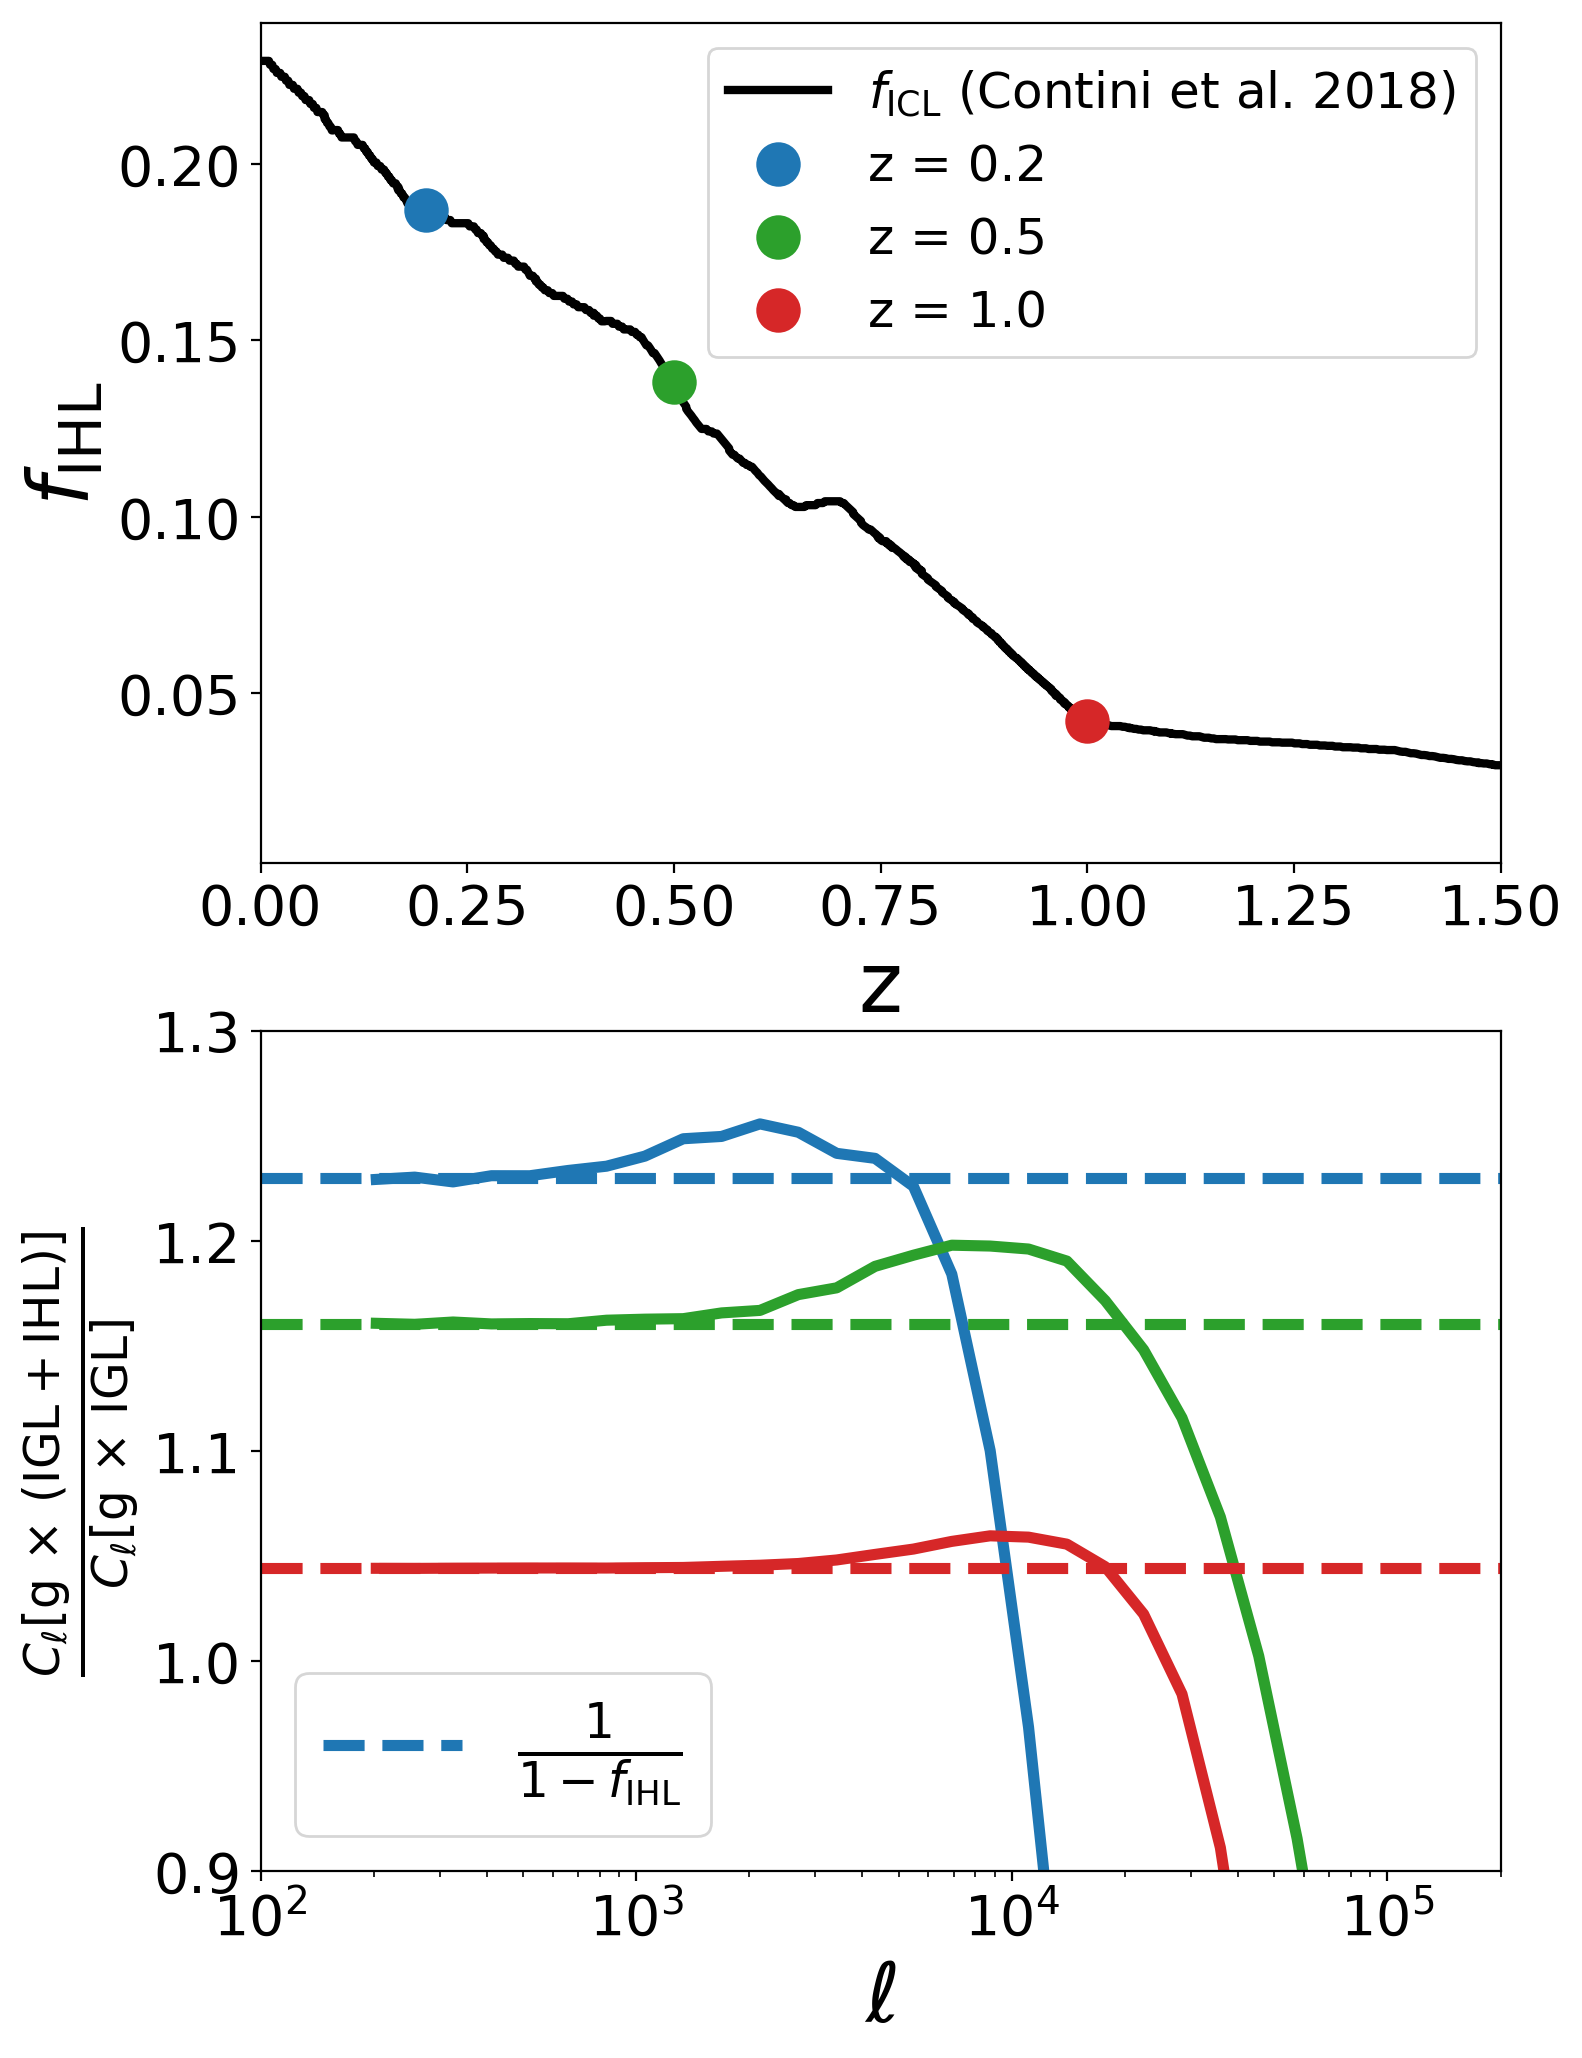

In [523]:
from micecat_field import *

m_th = 20
zg_arr = np.array([0.2, 0.5, 1.0])

fig, ax = plt.subplots(2,1,figsize=(8,12))

# 
data = np.loadtxt('fIHL_z_Contini2018.txt', delimiter=',')
z_data = data[:,0] - 1
f_IHL_data = data[:,1]
f_IHL_data = f_IHL_data[np.argsort(z_data)]
z_data = z_data[np.argsort(z_data)]
f_IHL_arr = np.interp(zg_arr, z_data, f_IHL_data)
ax[0].plot(z_data, f_IHL_data, 'k', lw=3, label=r'$f_{\rm ICL}$ (Contini et al. 2018)')
ax[0].set_xlim([0,1.5])

for i, (zg,f_IHL,c) in enumerate(zip(zg_arr, f_IHL_arr, ['C0','C2','C3'])):
    r_IHL = f_IHL / (1 - f_IHL)

    fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
    +'micecat_cross_Cl_data_zg{}_delz{}_mth{}.pkl'.format(zg,0.03, m_th)

    with open(fname, "rb") as f:
        Cl_data = pickle.load(f)

    ax[0].plot([zg], [f_IHL],'o',c=c,markersize=15,
               label='z = {}'.format(zg))

    l = Cl_data['l']
    Nfields = 50
    
    Clga = Cl_data['Clga']
    Clgh = Cl_data['Clgh']
    Clga_arr = np.median(Clga,axis=0) 
    Clga_err = (np.percentile(Clga,16,axis=0) - np.percentile(Clga,84,axis=0))/2/np.sqrt(Nfields)
    
    Clgh = Cl_data['Clga'] +r_IHL*Cl_data['Clgh']
    Clgh_arr= np.median(Clgh,axis=0)
    Clgh_err  = (np.percentile(Clgh,16,axis=0) - np.percentile(Clgh,84,axis=0))/2/np.sqrt(Nfields)

    Clsh = np.tile(np.mean(Clga[:,-3:],axis=1),(len(l),1)).T
    Clga -= Clsh
    Clga_arr = np.median(Clga,axis=0) 
    Clga_err = (np.percentile(Clga,16,axis=0) - np.percentile(Clga,84,axis=0))/2/np.sqrt(Nfields)

    Clsh = Clsh * (1+r_IHL)
    Clgh -= Clsh
    Clgh_arr= np.median(Clgh,axis=0) 
    Clgh_err  = (np.percentile(Clgh,16,axis=0) - np.percentile(Clgh,84,axis=0))/2/np.sqrt(Nfields)

    r_arr = np.median(Clgh/Clga,axis=0)
    r_err = (np.percentile(Clgh/Clga,16,axis=0) - np.percentile(Clgh/Clga,84,axis=0))/2/np.sqrt(Nfields)

    idx_cut = 15 if zg==0.2 else 23
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(r_arr[idx_cut-4:idx_cut]))
    r_fit = r_arr.copy()
    r_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))

    ax[1].semilogx(l, r_fit, c=c, lw=4)
    ax[1].axhline((1+r_IHL),c=c,ls='--', lw=4, label=r'$\frac{1}{1-f_{\rm IHL}}$')
    if i==0:
        ax[1].legend(fontsize=25)
ax[0].legend(fontsize=18)
ax[0].set_ylabel(r'$f_{\rm IHL}$', fontsize=30)
ax[0].set_xlabel('z', fontsize=30)
ax[1].set_yscale('linear')
ax[1].set_ylim([0.9,1.3])
ax[1].set_xlim([1e2,2e5])
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
ax[1].set_xlabel(r'$\ell$', fontsize=30)
ax[1].set_ylabel(r'$\frac{C_\ell{\rm [g\, \times\, (IGL + IHL)]}}{C_\ell{\rm [g\, \times\, IGL]}}$',
                 fontsize=25)

Text(0.5, 0, '$M_h[M_\\odot]$')

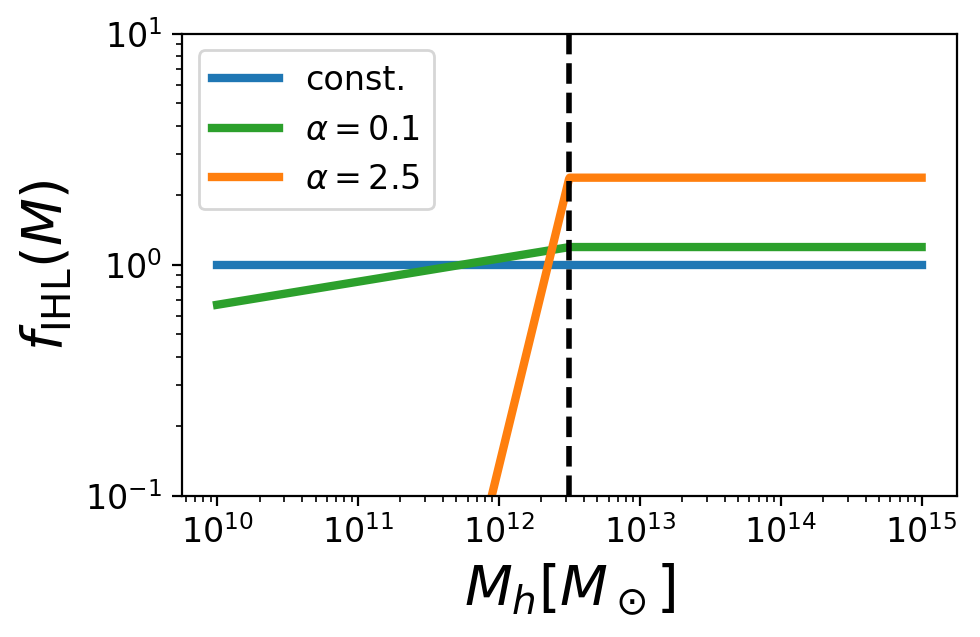

In [548]:
from micecat_field import *

zg = 0.2

Mh_arr = np.logspace(10,15,1000)
mcfield = micecat_field(2,32,Nx=1024,Ny=1024)
fig, ax = plt.subplots(1,1,figsize=(5,3))

for ialpha, (alpha,c,label) in enumerate(zip([None, 0.1, 2.5],['C0','C2','C1'],
                                             ['const.', r'$\alpha=0.1$',r'$\alpha=2.5$'])):
    if alpha is None:
        fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
        +'micecat_cross_Cl_data_zg{}_delz{}_mth{}.pkl'.format(zg,0.03, m_th)
        f_IHL = mcfield.f_IHL_const(np.log10(Mh_arr), f_IHL=1, logM_min=-np.inf)
    else:
        fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
        +'micecat_cross_Cl_data_zg{}_delz{}_mth{}_alpha{}.pkl'.format(zg,0.03, m_th, alpha)
        f_IHL = mcfield.f_IHL_purcell(np.log10(Mh_arr), alpha=alpha, f_IHL=1, logM_min=-np.inf)

    with open(fname, "rb") as f:
        Cl_data = pickle.load(f)

    Clh_scale = np.median(np.sqrt(Cl_data['Cla'][:,:5]/Cl_data['Clh'][:,:5]))
    f_IHL *= Clh_scale
    ax.loglog(Mh_arr, f_IHL, lw=3, c=c, label=label)
ax.legend(fontsize=12)    
ax.axvline(10**12.5, c='k', ls='--', lw=2)
ax.tick_params(labelsize=12)
ax.set_ylim([1e-1,1e1])
ax.set_ylabel(r'$f_{\rm IHL} (M)$', fontsize=20)
ax.set_xlabel(r'$M_h[M_\odot]$', fontsize=20)

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in log


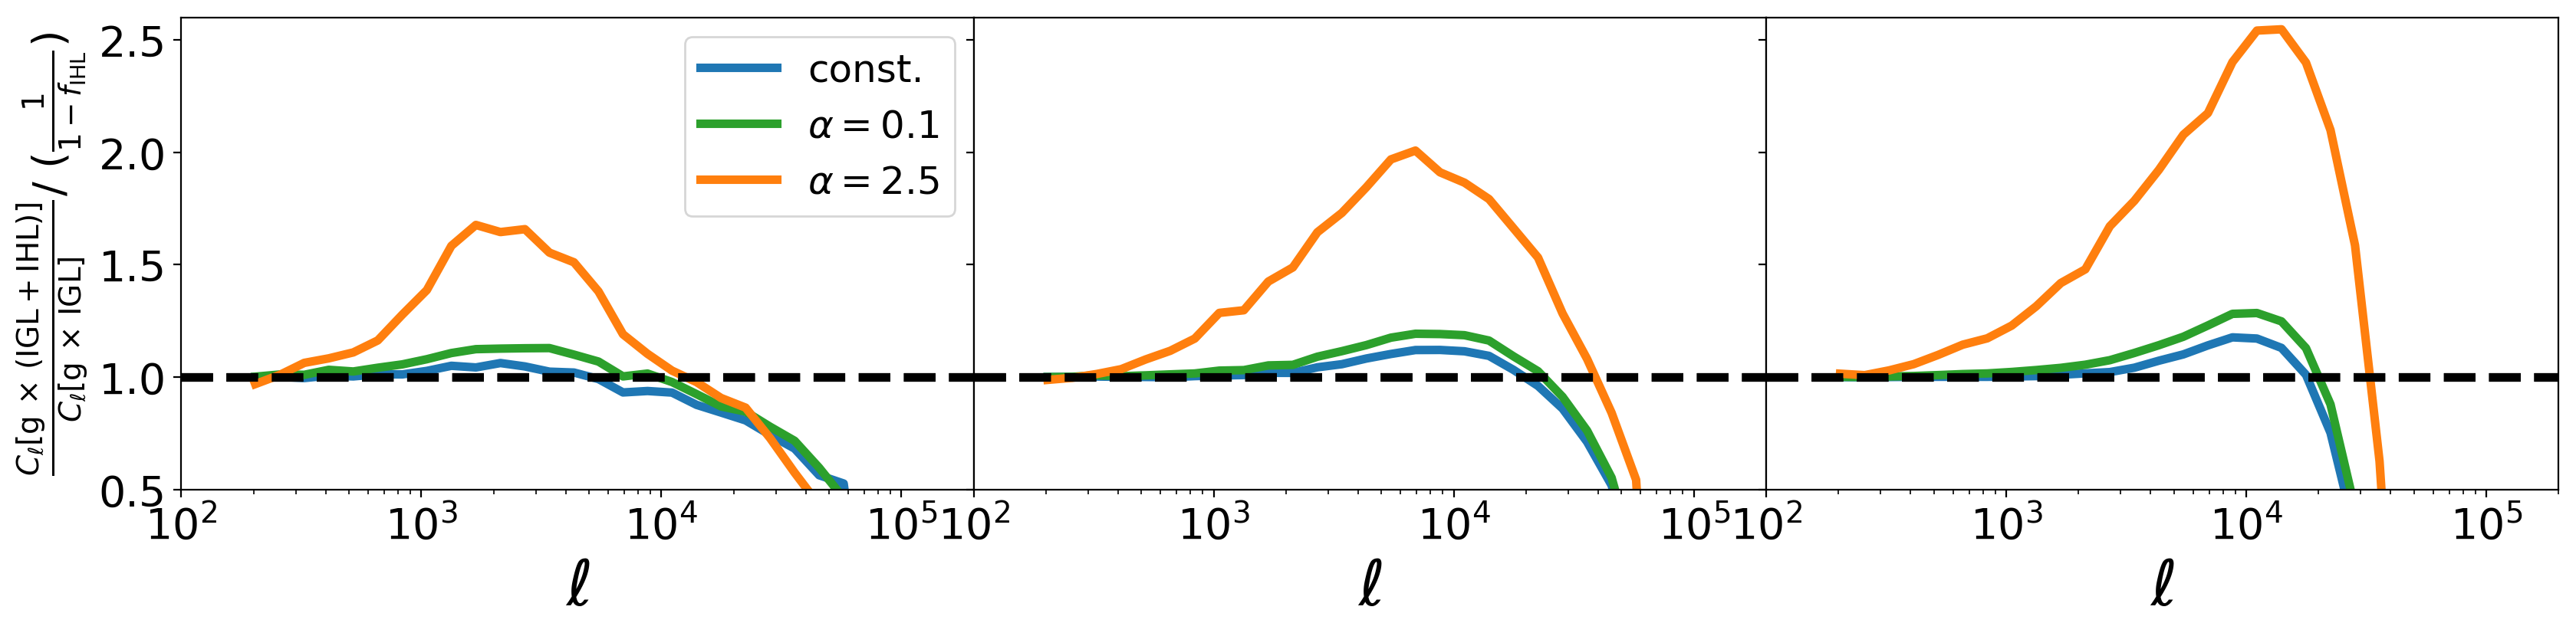

In [530]:
from micecat_field import *

m_th = 20
f_IHL = 0.5
zg_arr = np.array([0.2, 0.5, 1.0])

r_IHL = f_IHL / (1 - f_IHL)
fig, ax = plt.subplots(1,3, figsize=(20,4))

for ialpha, (alpha,c,label) in enumerate(zip([None, 0.1, 2.5],['C0','C2','C1'],
                                             ['const.', r'$\alpha=0.1$',r'$\alpha=2.5$'])):
    for iz, zg in enumerate(zg_arr):
        if alpha is None:
            fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
            +'micecat_cross_Cl_data_zg{}_delz{}_mth{}.pkl'.format(zg,0.03, m_th)
        else:
            fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
            +'micecat_cross_Cl_data_zg{}_delz{}_mth{}_alpha{}.pkl'.format(zg,0.03, m_th, alpha)

        with open(fname, "rb") as f:
            Cl_data = pickle.load(f)

        l = Cl_data['l']
        Nfields = 50
        # ==============
        Clh_scale = np.median(np.sqrt(Cl_data['Cla'][:,:1]/Cl_data['Clh'][:,:1]), axis=1)
        Clh_scale = np.tile(Clh_scale,(len(l),1)).T
        Cl_data['Clgh'] = Cl_data['Clgh'] * Clh_scale
        # ==============
        Clga = Cl_data['Clga']
        Clgh = Cl_data['Clgh']
        Clga_arr = np.median(Clga,axis=0) 
        Clga_err = (np.percentile(Clga,16,axis=0) - np.percentile(Clga,84,axis=0))/2/np.sqrt(Nfields)

        Clgh = Cl_data['Clga'] +r_IHL*Cl_data['Clgh']
        Clgh_arr= np.median(Clgh,axis=0)
        Clgh_err  = (np.percentile(Clgh,16,axis=0) - np.percentile(Clgh,84,axis=0))/2/np.sqrt(Nfields)

        Clsh = np.tile(np.mean(Clga[:,-3:],axis=1),(len(l),1)).T
        Clga -= Clsh
        Clga_arr = np.median(Clga,axis=0) 
        Clga_err = (np.percentile(Clga,16,axis=0) - np.percentile(Clga,84,axis=0))/2/np.sqrt(Nfields)

        Clsh = Clsh * (1+r_IHL)
        Clgh -= Clsh
        Clgh_arr= np.median(Clgh,axis=0) 
        Clgh_err  = (np.percentile(Clgh,16,axis=0) - np.percentile(Clgh,84,axis=0))/2/np.sqrt(Nfields)

        r_arr = np.median(Clgh/Clga,axis=0)
        r_err = (np.percentile(Clgh/Clga,16,axis=0) - np.percentile(Clgh/Clga,84,axis=0))/2/np.sqrt(Nfields)

        
        if zg==0.2:
            idx_cut = 26
        if zg==0.5:
            idx_cut = 26
        if zg==1:
            idx_cut = 26
        spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                        np.log(r_arr[idx_cut-4:idx_cut]))
        r_fit = r_arr.copy()
        r_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
        
        ax[iz].semilogx(l, r_fit/(1+r_IHL), c=c, lw=4, label=label)
        ax[iz].axhline(1, lw=4, ls='--', c='k')
        ax[iz].set_ylim([0.5,2.6])
        ax[iz].set_xlim([1e2,2e5])
        ax[iz].tick_params(labelsize=20)
        ax[iz].set_xlabel(r'$\ell$', fontsize=30)
ax[0].legend(fontsize=18)
ax[0].set_ylabel(r'$\frac{C_\ell{\rm [g\, \times\, (IGL + IHL)]}}{C_\ell{\rm [g\, \times\, IGL]}}$'+\
                     r'/ $(\frac{1}{1-f_{\rm IHL}})$',
                 fontsize=20)
ax[1].tick_params(axis='y',labelleft=False)
ax[2].tick_params(axis='y',labelleft=False)
plt.subplots_adjust(wspace=0)

In [554]:
# for m_th in [20]:
#     for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_grid.flatten(), dec_grid.flatten())):
#         if ifield==0:
#             print("_ = run_IHL_Cl_mkk({}, {}, m_th={}, savemaps=True, PSF_Gaussian_sig_arr=[0,7,70])"\
#                   .format(ra_cent, dec_cent, m_th))
#         else:
#             print("_ = run_IHL_Cl_mkk({}, {}, m_th={}, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])"\
#                   .format(ra_cent, dec_cent, m_th))

In [ ]:
_ = run_IHL_Cl_mkk(32, 2, m_th=20, savemaps=True, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(32, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(32, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(32, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(32, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])

In [ ]:
_ = run_IHL_Cl_mkk(32, 2, m_th=20, savemaps=True, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(32, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(32, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(32, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(32, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(36, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(40, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(44, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(48, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(52, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 2, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 8, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 14, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 20, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
_ = run_IHL_Cl_mkk(56, 26, m_th=20, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])